[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rsarka34/NPTEL-Deep-Learning-Hands-on-NOC24EE04-/new/main/week2/week2.ipynb)

**Feature extraction from Images: Local binay pattern, Gray level co-occurance matrix, and its derevatives**

**GitHub Profile:** [https://github.com/rsarka34](https://github.com/rsarka34)

**Official Website:** [https://sites.google.com/view/arka-roy/home](https://sites.google.com/view/arka-roy/home)

**Dataset used:** [Cifar10](https://www.cs.toronto.edu/~kriz/cifar.html).
 The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

**Dataset used:** [MNIST](https://yann.lecun.com/exdb/mnist/).
 The CIFAR-10 dataset consists of 60000 28X28 gray-scale images in 10 classes. There are 60000 training images and 10000 test images.

**Library used to extract feature:**[ skimage](https://scikit-image.org/)

In [2]:
import PIL
import tqdm
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.filters import gabor
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops

In [3]:
from tqdm import tqdm
import time

# Define an iterable (e.g., range) and wrap it with tqdm
for i in tqdm(range(20)):
    # Simulate some computation
    time.sleep(0.1)

100%|██████████| 20/20 [00:02<00:00,  9.58it/s]


**Download the Cifar10 dataset**

In [ ]:
trainDataset =  datasets.CIFAR10('./cifar10/', train=True, download=True)
testDataset =  datasets.CIFAR10('./cifar10/', train=False, download=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 43900057.44it/s]


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10/
Files already downloaded and verified


In [ ]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainDataset)))
print('No. of samples in test set: '+str(len(testDataset)))

No. of samples in train set: 50000
No. of samples in test set: 10000


In [ ]:
# Feature extraction on single image
img = trainDataset[0][0] #PIL image
type(img)
width, height = img.size
print('The size of the image = (' + str(height)+','+str(width)+')')

The size of the image = (32,32)


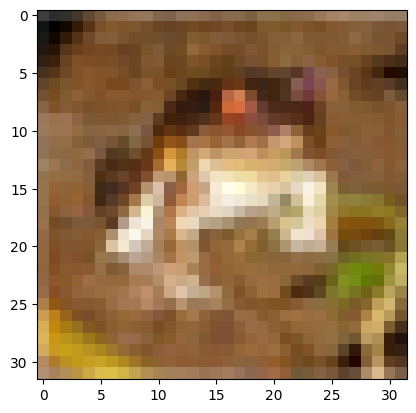

In [ ]:
img_gray = img.convert('L') #Converting to grayscale
img_arr = np.array(img_gray) #Converting to array
plt.imshow(img)

**Load CIFAR Using tensorflow-keras**

In [ ]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('Train dataset shape = '+str(train_images.shape))
print('Test dataset shape = '+str(test_images.shape))

11490434/11490434 [==============================] - 0s 0us/step
Train dataset shape = (60000, 28, 28)
Test dataset shape = (10000, 28, 28)


Text(0.5, 1.0, 'This digit is = 4')

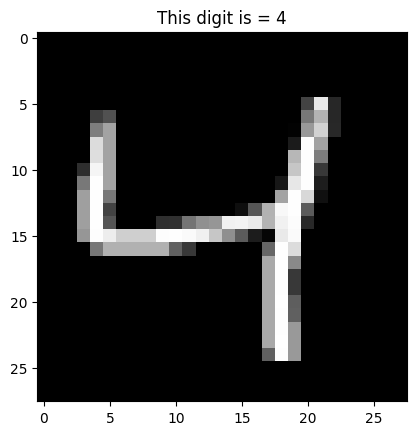

In [ ]:
idx=2

plt.imshow(train_images[idx], cmap='gray');
plt.title('This digit is = ' +str(train_labels[idx]))

In [ ]:
def plot_10_by_10_images(images):
    # figure size
    fig = plt.figure(figsize=(10,10))
    # plot image grid
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x+1)
            plt.imshow(images[10*y+x])
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

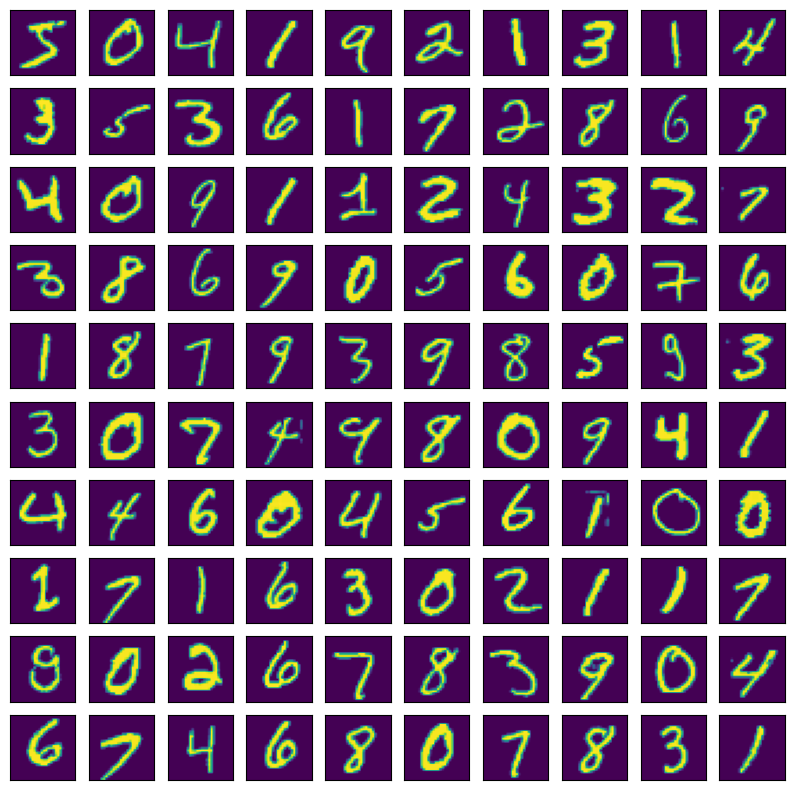

In [ ]:
plot_10_by_10_images(train_images[:100])

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Train dataset shape = ' + str(x_train.shape))
print('Test dataset shape = ' + str(x_test.shape))

170498071/170498071 [==============================] - 4s 0us/step
Train dataset shape = (50000, 32, 32, 3)
Test dataset shape = (10000, 32, 32, 3)


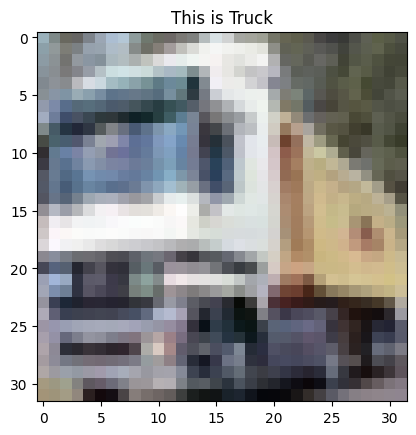

In [ ]:
label_names = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}

idx = 1
x_train_img = x_train[idx]
y_train_label = y_train[idx][0]  # Extract the actual class label

def plot_the_data(x_img, lbl):
    plt.imshow(x_img)
    plt.title('This is ' + (label_names[lbl]))
    plt.show()

plot_the_data(x_train_img, y_train_label)

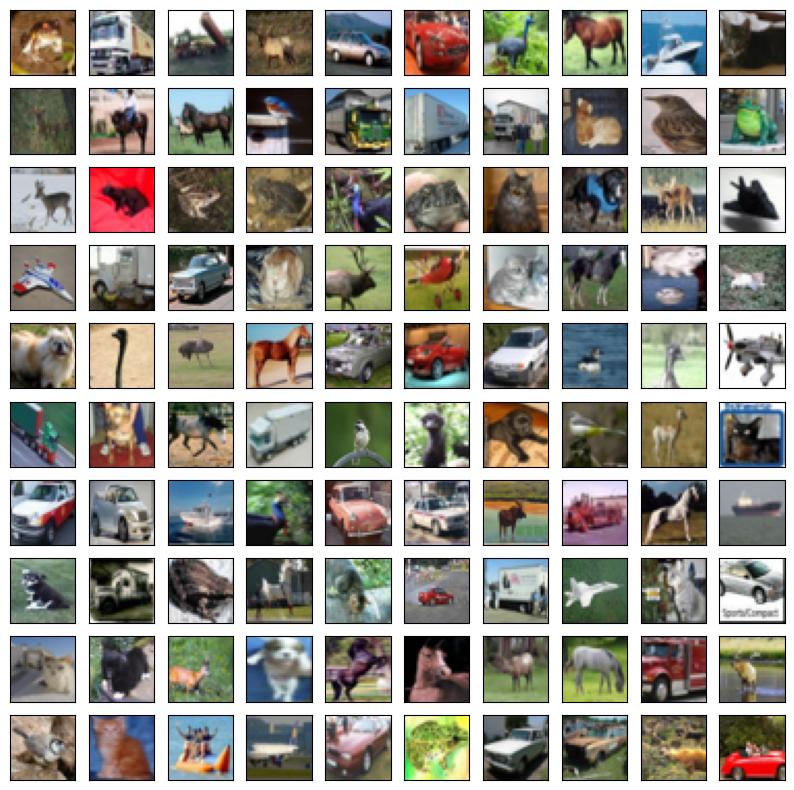

In [ ]:
plot_10_by_10_images(x_train[:100])

**Local binary pattern**

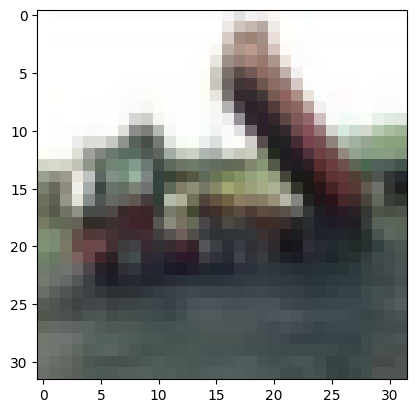

In [ ]:
image_ar=x_train[2,:,:,:]
plt.imshow(image_ar)

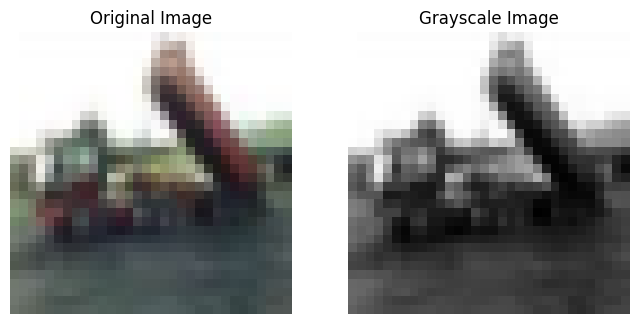

In [ ]:
image_index = 2
image_3channel = x_train[image_index,:,:,:]
# Convert the selected image to grayscale
gray_image = tf.image.rgb_to_grayscale(image_3channel)

# Reshape the grayscale image
gray_image = tf.squeeze(gray_image)

# Display the original and grayscale images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_3channel)
plt.title("Original Image")
plt.axis("off")

# Grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [ ]:
gray_image.shape

TensorShape([32, 32])

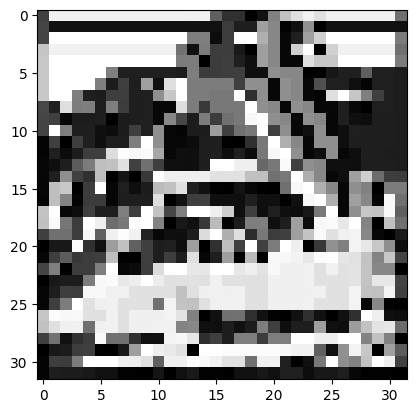

In [ ]:
# Finding LBP
fea_lbp = local_binary_pattern(gray_image,8,1) #Radius = 1, No. of neighbours = 8
fea_lbp = np.uint8((fea_lbp/fea_lbp.max())*255) #Converting to unit8
plt.imshow(fea_lbp, cmap='gray')

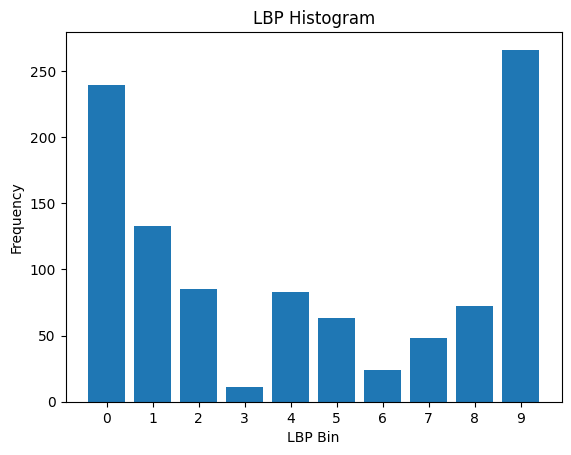

LBP energy = 0.16387367248535156
LBP entropy = 2.890365581653176


In [ ]:
# Energy and Entropy of LBP feature
lbp_hist,_ = np.histogram(fea_lbp,10)
lbp_hist = np.array(lbp_hist,dtype=float)

# Plot LBP histogram
plt.bar(range(10), lbp_hist, align='center', alpha=1)
plt.title('LBP Histogram')
plt.xlabel('LBP Bin')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.show()

lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
lbp_energy = np.sum(lbp_prob**2)
lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
print('LBP energy = '+str(lbp_energy))
print('LBP entropy = '+str(lbp_entropy))

**Co-occurance matrix**

In [ ]:
img_arr.shape

(32, 32)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')


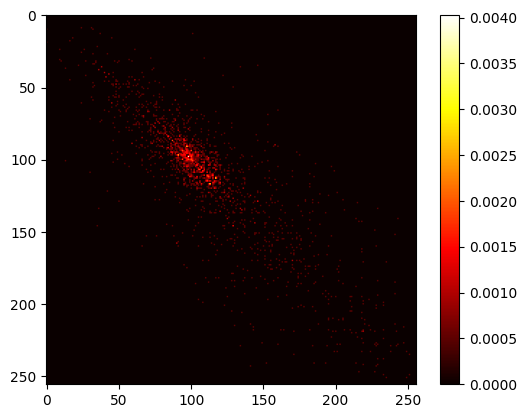

In [ ]:
gCoMat = greycomatrix(img_arr, [1], [0],256,symmetric=True, normed=True)
vis_glcm=gCoMat[:,:,0,0]
plt.imshow(vis_glcm, cmap='hot')
plt.colorbar()

In [ ]:
contrast = greycoprops(gCoMat, prop='contrast')
dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
homogeneity = greycoprops(gCoMat, prop='homogeneity')
energy = greycoprops(gCoMat, prop='energy')
correlation = greycoprops(gCoMat, prop='correlation')
print('Contrast = '+str(contrast[0][0]))
print('Dissimilarity = '+str(dissimilarity[0][0]))
print('Homogeneity = '+str(homogeneity[0][0]))
print('Energy = '+str(energy[0][0]))
print('Correlation = '+str(correlation[0][0]))

Contrast = 547.4032258064517
Dissimilarity = 15.260080645161294
Homogeneity = 0.10514779794096502
Energy = 0.028144684694180883
Correlation = 0.8359299174325512


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

**Gabor filtering**

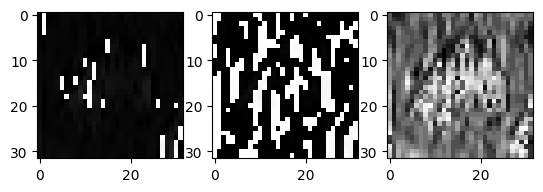

In [ ]:
# Gabor filter
gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
gaborFilt = np.sqrt((gaborFilt_real**2+gaborFilt_imag**2))
# Displaying the filter response
fig, ax = plt.subplots(1,3)
ax[0].imshow(gaborFilt_real,cmap='gray')
ax[1].imshow(gaborFilt_imag,cmap='gray')
ax[2].imshow(gaborFilt,cmap='gray')

**Generating features from all the images**

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Train dataset shape = ' + str(x_train.shape))
print('Test dataset shape = ' + str(x_test.shape))

11490434/11490434 [==============================] - 0s 0us/step
Train dataset shape = (60000, 28, 28)
Test dataset shape = (10000, 28, 28)


In [10]:
# Generating training data by extracting features from all images
class_labels = []
featLength = 2+5+2
trainFeats = np.zeros((2000,featLength))  # you can replace 2000 by x_train.shape[0]

for tr in tqdm(range(2000)): # you can replace 2000 by x_train.shape[0]
    img = x_train[i,:,:] #One image at a time
    img_arr = np.array(img) #Converting to array
    # LBP
    feat_lbp = local_binary_pattern(img_arr,5,2,'uniform')
    lbp_hist,_ = np.histogram(feat_lbp,8)
    lbp_hist = np.array(lbp_hist,dtype=float)
    lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
    lbp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
    # GLCM
    gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True)
    contrast = greycoprops(gCoMat, prop='contrast');
    dissimilarity = greycoprops(gCoMat, prop='dissimilarity');
    homogeneity = greycoprops(gCoMat, prop='homogeneity');
    energy = greycoprops(gCoMat, prop='energy');
    correlation = greycoprops(gCoMat, prop='correlation');
    feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])
    # Gabor filter
    gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
    gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilt,8)
    gabor_hist = np.array(gabor_hist,dtype=float)
    gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
    gabor_energy = np.nansum(gabor_prob**2)
    gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
    # Concatenating features(2+5+2)
    concat_feat = np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]),axis=0)#[lbp_energy,lbp_entropy],
    trainFeats[tr,:] = concat_feat #Stacking features vectors for each image
    # Class label
    class_labels.append(y_train[tr])

trainLabel = np.array(class_labels)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
 84%|████████▍ | 1688/2000 [00:25<00:06, 46.58it/s]<ipython-input-10-a1f6bb44fac4>:15: RuntimeWarning: divide by zero encountered in log2
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
<ipython-input-10-a1f6bb44fac

**Save them in pickle file**

In [11]:
import pickle
def pickle_save(location_to_save,dumping_var):
    outfile = open(location_to_save,'wb')
    pickle.dump(dumping_var,outfile)
    outfile.close()
    print('=========done=========')

base_location='/content/'
saving_features=base_location+'trainFeatures_2k' #'/content/trainFeatures_2k'
saving_labels=base_location+'trainlabels_2k'

pickle_save(saving_features,trainFeats)
pickle_save(saving_labels,trainLabel)

=========done=========
=========done=========


**Loading the pickle file**

In [12]:
import pickle
def load_pickle_file(name_of_file):
    infile = open(name_of_file,'rb')
    wgt = pickle.load(infile)
    infile.close()
    print('=========loading done=========')
    return wgt

arr_from_pkl= load_pickle_file('/content/trainFeatures_2k')
arr_from_pkl.shape

=========loading done=========


(2000, 9)

**Audio signal**

Sampling rate = 22050


Text(0.5, 1.0, 'Audio signal')

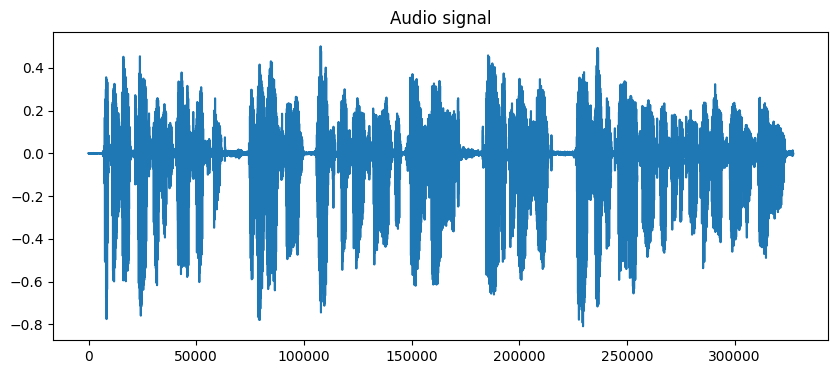

In [ ]:
import librosa
y, sr = librosa.load(librosa.ex('libri1'))
print('Sampling rate = '+str(sr))
plt.figure(figsize=(10,4))
plt.plot(y);plt.title('Audio signal')

**MFCC Extraction**

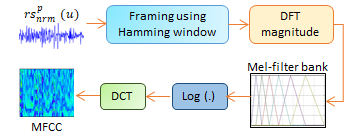

[Text(0.5, 1.0, 'MFCC')]

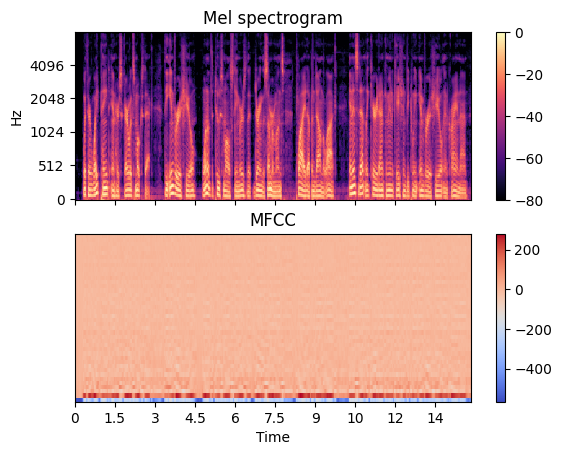

In [ ]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                   fmax=8000)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, dct_type=2)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

# **Demonstration on UrbanSound8k**

In [ ]:
import os
import time
import librosa
import zipfile
import numpy as np
import pandas as pd
import librosa.display
import IPython.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PIL import Image

In [ ]:
# Unzip dataset
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz -O urban8k.tgz
!tar -xzf urban8k.tgz
!rm urban8k.tgz

--2024-02-02 14:15:17--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.98.238, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1203745/files/UrbanSound8K.tar.gz [following]
--2024-02-02 14:15:18--  https://zenodo.org/records/1203745/files/UrbanSound8K.tar.gz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘urban8k.tgz’

urban8k.tgz         100%[===================>]   5.61G  18.3MB/s    in 5m 18s  

2024-02-02 14:20:37 (18.1 MB/s) - ‘urban8k.tgz’ saved [6023741708/6023741708]



In [ ]:
!cat UrbanSound8K/UrbanSound8K_README.txt

UrbanSound8K

Created By
----------

Justin Salamon*^, Christopher Jacoby* and Juan Pablo Bello*
* Music and Audio Research Lab (MARL), New York University, USA
^ Center for Urban Science and Progress (CUSP), New York University, USA
http://serv.cusp.nyu.edu/projects/urbansounddataset
http://marl.smusic.nyu.edu/
http://cusp.nyu.edu/

Version 1.0


Description
-----------

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, 
children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, and street_music. The classes are 
drawn from the urban sound taxonomy described in the following article, which also includes a detailed description of 
the dataset and how it was compiled:

J. Salamon, C. Jacoby and J. P. Bello, "A Dataset and Taxonomy for Urban Sound Research", 
22nd ACM International Conference on Multimedia, Orlando USA, Nov. 2014.

All excerpts are taken from field recordings uploaded to www.freesou

In [ ]:
def create_dataset_df(csv_file):
    dataset_df = pd.read_csv(csv_file)
    filepaths = []
    for i, row in dataset_df.iterrows():
        filepaths.append(os.path.join('UrbanSound8K/audio', 'fold'+str(row['fold']), row['slice_file_name']))
    dataset_df['filepath'] = filepaths
    return dataset_df

In [ ]:
dataset_df = create_dataset_df('UrbanSound8K/metadata/UrbanSound8K.csv')
dataset_df

slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class                                     filepath  
0           3          dog_bark    UrbanSound8K/audio/fold5/100032-3-0-0.wav  
1           2  children_playing  UrbanSound8K/audio/fold5/100263-2-0-117.wav  
2           2  children_playing  UrbanSound8K/audio/fold5/100263-2-0-121.wav  
3           2  children_playing  UrbanSound8K/audio/fold5/100263-2-0-126.wav  
4           2  children_playing  UrbanSound8K/audio/fold5/100263-2-0-137.wav  
...       ...               ...                                          ...  
8727        1          car_horn     UrbanSound8K/audio/fold7/99812-1-2-0.wav  
8728        1          car_horn     UrbanSound8K/audio/fold7/99812-1-3-0.wav  
8729        1          car_horn     UrbanSound8K/audio/fold7/99812-1-4-0.wav  
8730        1          car_horn     UrbanSound8K/audio/fold7/99812-1-5-0.wav  
8731        1          car_horn     UrbanSound8K/audio/fold7/99812-1-6-0.wav  

[8732 rows x 9 columns]

In [ ]:
dataset_df.groupby('class').slice_file_name.count()

class
air_conditioner     1000
car_horn             429
children_playing    1000
dog_bark            1000
drilling            1000
engine_idling       1000
gun_shot             374
jackhammer          1000
siren                929
street_music        1000
Name: slice_file_name, dtype: int64

In [ ]:
dataset_df = dataset_df.drop(columns=['fold', 'slice_file_name', 'fsID', 'start', 'end'])
dataset_df

salience  classID             class  \
0            1        3          dog_bark   
1            1        2  children_playing   
2            1        2  children_playing   
3            1        2  children_playing   
4            1        2  children_playing   
...        ...      ...               ...   
8727         2        1          car_horn   
8728         2        1          car_horn   
8729         2        1          car_horn   
8730         2        1          car_horn   
8731         2        1          car_horn   

                                         filepath  
0       UrbanSound8K/audio/fold5/100032-3-0-0.wav  
1     UrbanSound8K/audio/fold5/100263-2-0-117.wav  
2     UrbanSound8K/audio/fold5/100263-2-0-121.wav  
3     UrbanSound8K/audio/fold5/100263-2-0-126.wav  
4     UrbanSound8K/audio/fold5/100263-2-0-137.wav  
...                                           ...  
8727     UrbanSound8K/audio/fold7/99812-1-2-0.wav  
8728     UrbanSound8K/audio/fold7/99812-1-3-0.wav  
8729     UrbanSound8K/audio/fold7/99812-1-4-0.wav  
8730     UrbanSound8K/audio/fold7/99812-1-5-0.wav  
8731     UrbanSound8K/audio/fold7/99812-1-6-0.wav  

[8732 rows x 4 columns]

In [ ]:
# Randomly select one sample of each class
random_samples = dataset_df.groupby('class').sample(1)
audio_samples, labels = random_samples['filepath'].tolist(), random_samples['class'].tolist()

In [ ]:
audio_samples

['UrbanSound8K/audio/fold1/59277-0-0-6.wav',
 'UrbanSound8K/audio/fold5/185436-1-0-0.wav',
 'UrbanSound8K/audio/fold2/174906-2-0-21.wav',
 'UrbanSound8K/audio/fold4/109711-3-2-4.wav',
 'UrbanSound8K/audio/fold9/54976-4-1-3.wav',
 'UrbanSound8K/audio/fold6/111386-5-1-7.wav',
 'UrbanSound8K/audio/fold4/7064-6-2-0.wav',
 'UrbanSound8K/audio/fold6/30206-7-0-25.wav',
 'UrbanSound8K/audio/fold6/74726-8-0-10.wav',
 'UrbanSound8K/audio/fold7/21683-9-0-30.wav']

In [ ]:
random_samples

salience  classID             class  \
6971         1        0   air_conditioner   
4529         2        1          car_horn   
3652         2        2  children_playing   
600          1        3          dog_bark   
6798         1        4          drilling   
647          1        5     engine_idling   
7381         1        6          gun_shot   
6029         1        7        jackhammer   
7815         2        8             siren   
5572         1        9      street_music   

                                        filepath  
6971    UrbanSound8K/audio/fold1/59277-0-0-6.wav  
4529   UrbanSound8K/audio/fold5/185436-1-0-0.wav  
3652  UrbanSound8K/audio/fold2/174906-2-0-21.wav  
600    UrbanSound8K/audio/fold4/109711-3-2-4.wav  
6798    UrbanSound8K/audio/fold9/54976-4-1-3.wav  
647    UrbanSound8K/audio/fold6/111386-5-1-7.wav  
7381     UrbanSound8K/audio/fold4/7064-6-2-0.wav  
6029   UrbanSound8K/audio/fold6/30206-7-0-25.wav  
7815   UrbanSound8K/audio/fold6/74726-8-0-10.wav  
5572   UrbanSound8K/audio/fold7/21683-9-0-30.wav

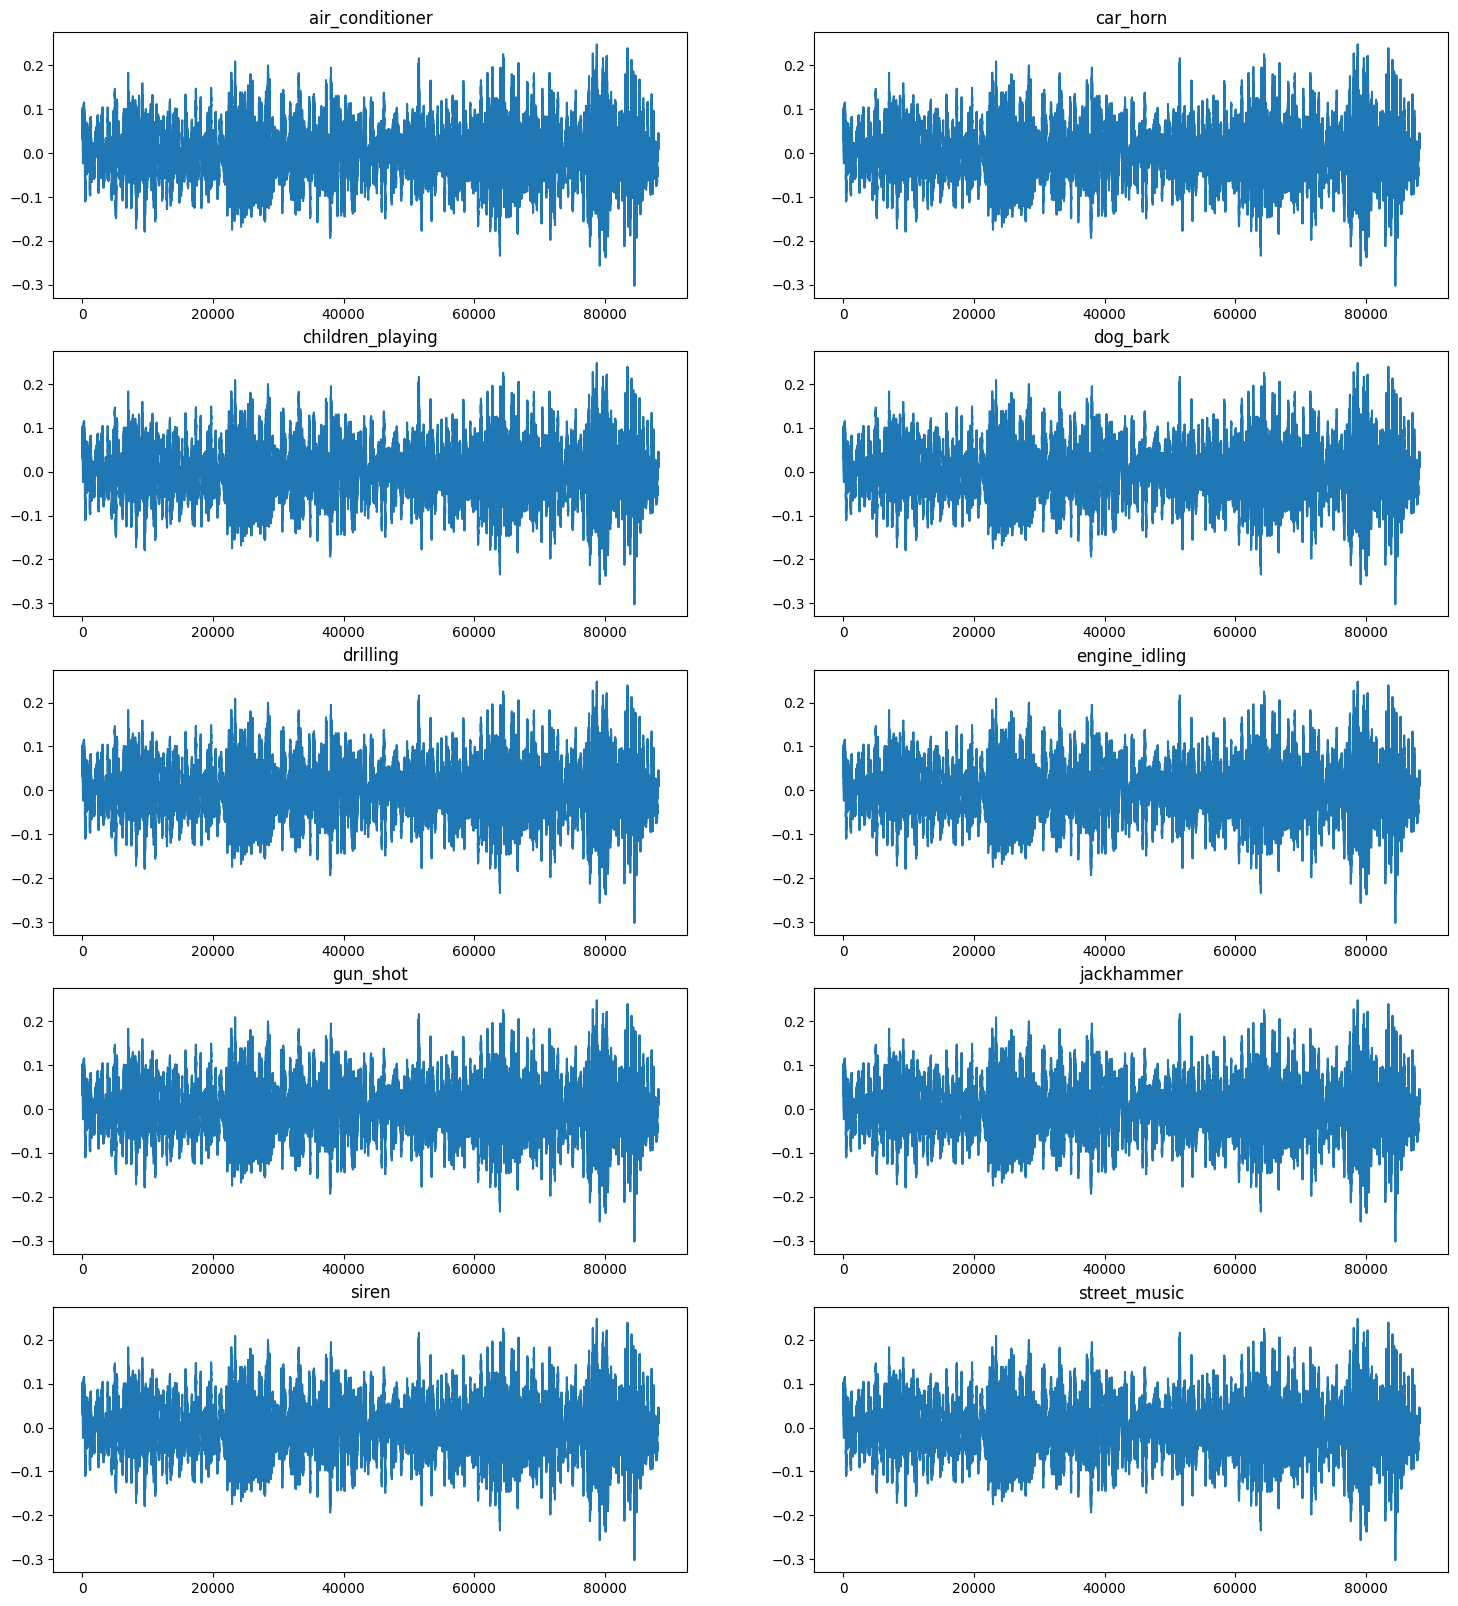

In [ ]:
# Randomly select one sample of each class
random_samples = dataset_df.groupby('class').sample(1)
audio_samples, labels = random_samples['filepath'].tolist(), random_samples['class'].tolist()

# Visualize the waveforms
fig, axs = plt.subplots(5, 2, figsize=(18,20))
index = 0
for i in range(10):
    audio_file, sample_rate = librosa.load(audio_samples[index])
    plt.subplot(5,2,i+1)
    plt.plot(audio_file)#librosa.display.waveplot(audio_file, sample_rate, ax=axs[row][col])
    plt.title(labels[i])

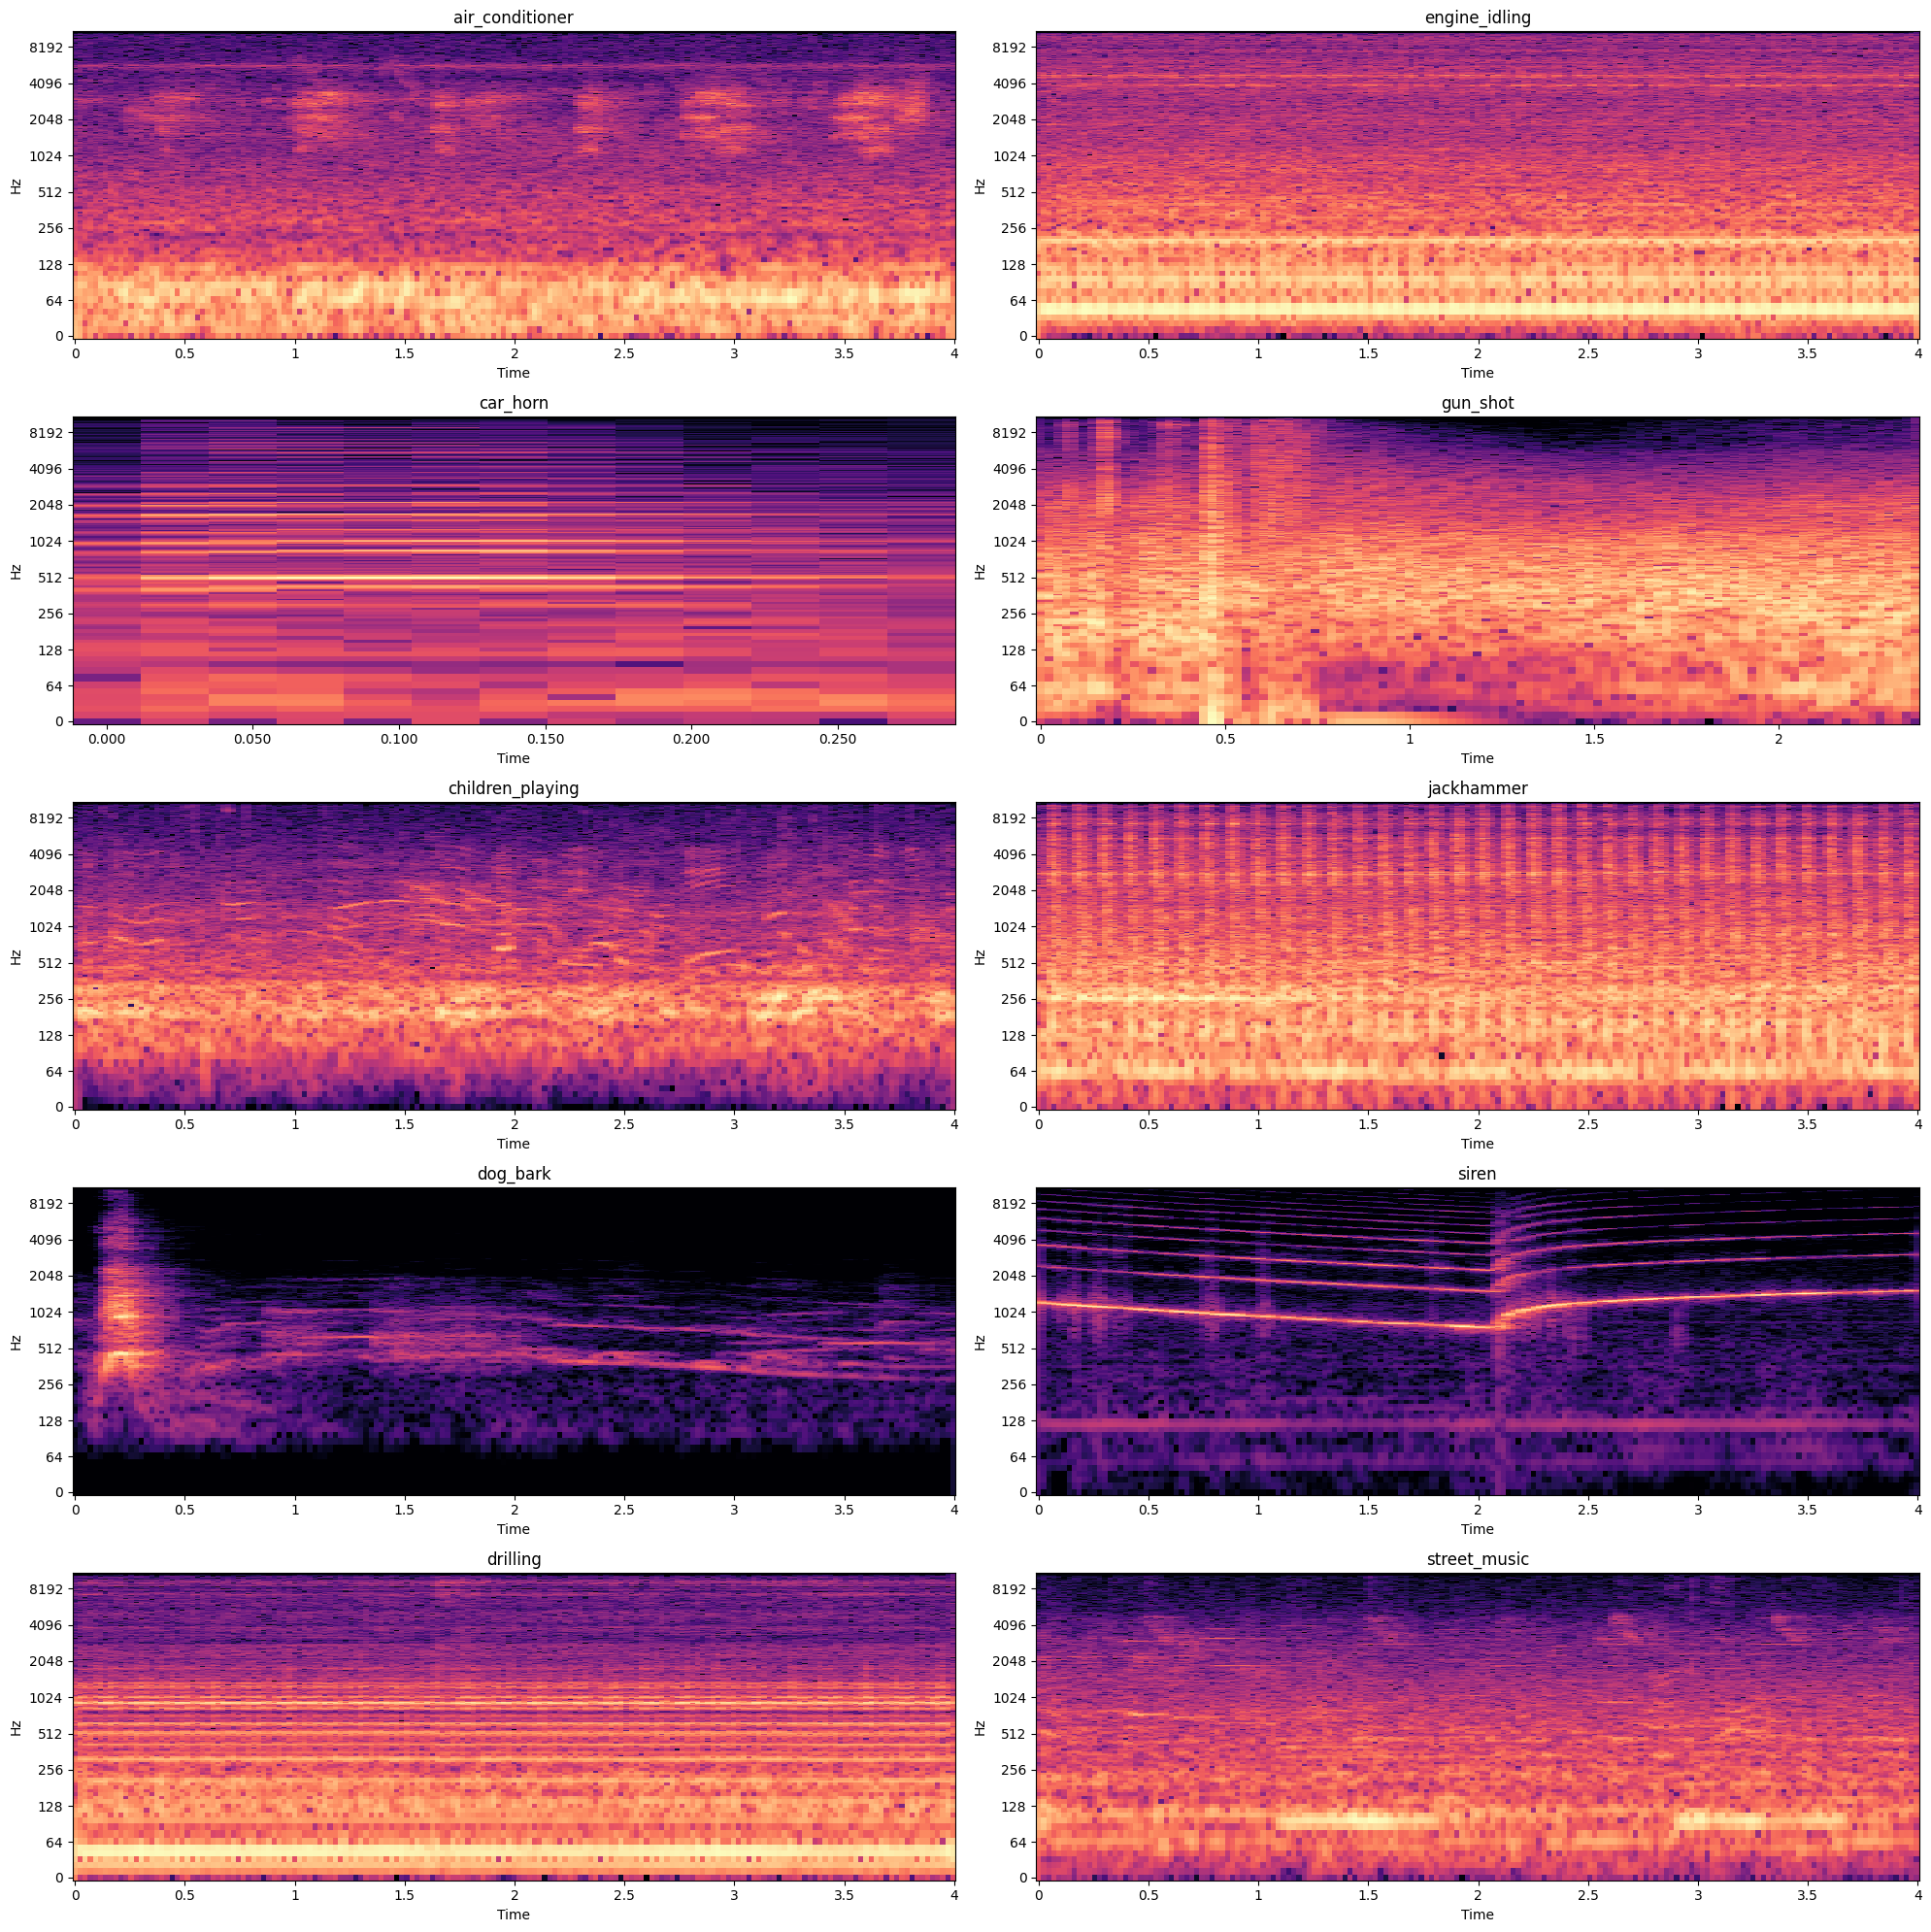

In [ ]:
# Visualize the STFT
fig, axs = plt.subplots(5, 2, figsize=(20,20))
index = 0
n_s = 4
for col in range(2):
    for row in range(5):
        audio_file, sample_rate = librosa.load(audio_samples[index])
        stft = librosa.stft(y=audio_file,n_fft=2048,hop_length=512,win_length=2048,window='hann')  # STFT of y
        S_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
        librosa.display.specshow(S_db,
                             x_axis="time",
                             y_axis='log',
                             ax=axs[row][col])
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()

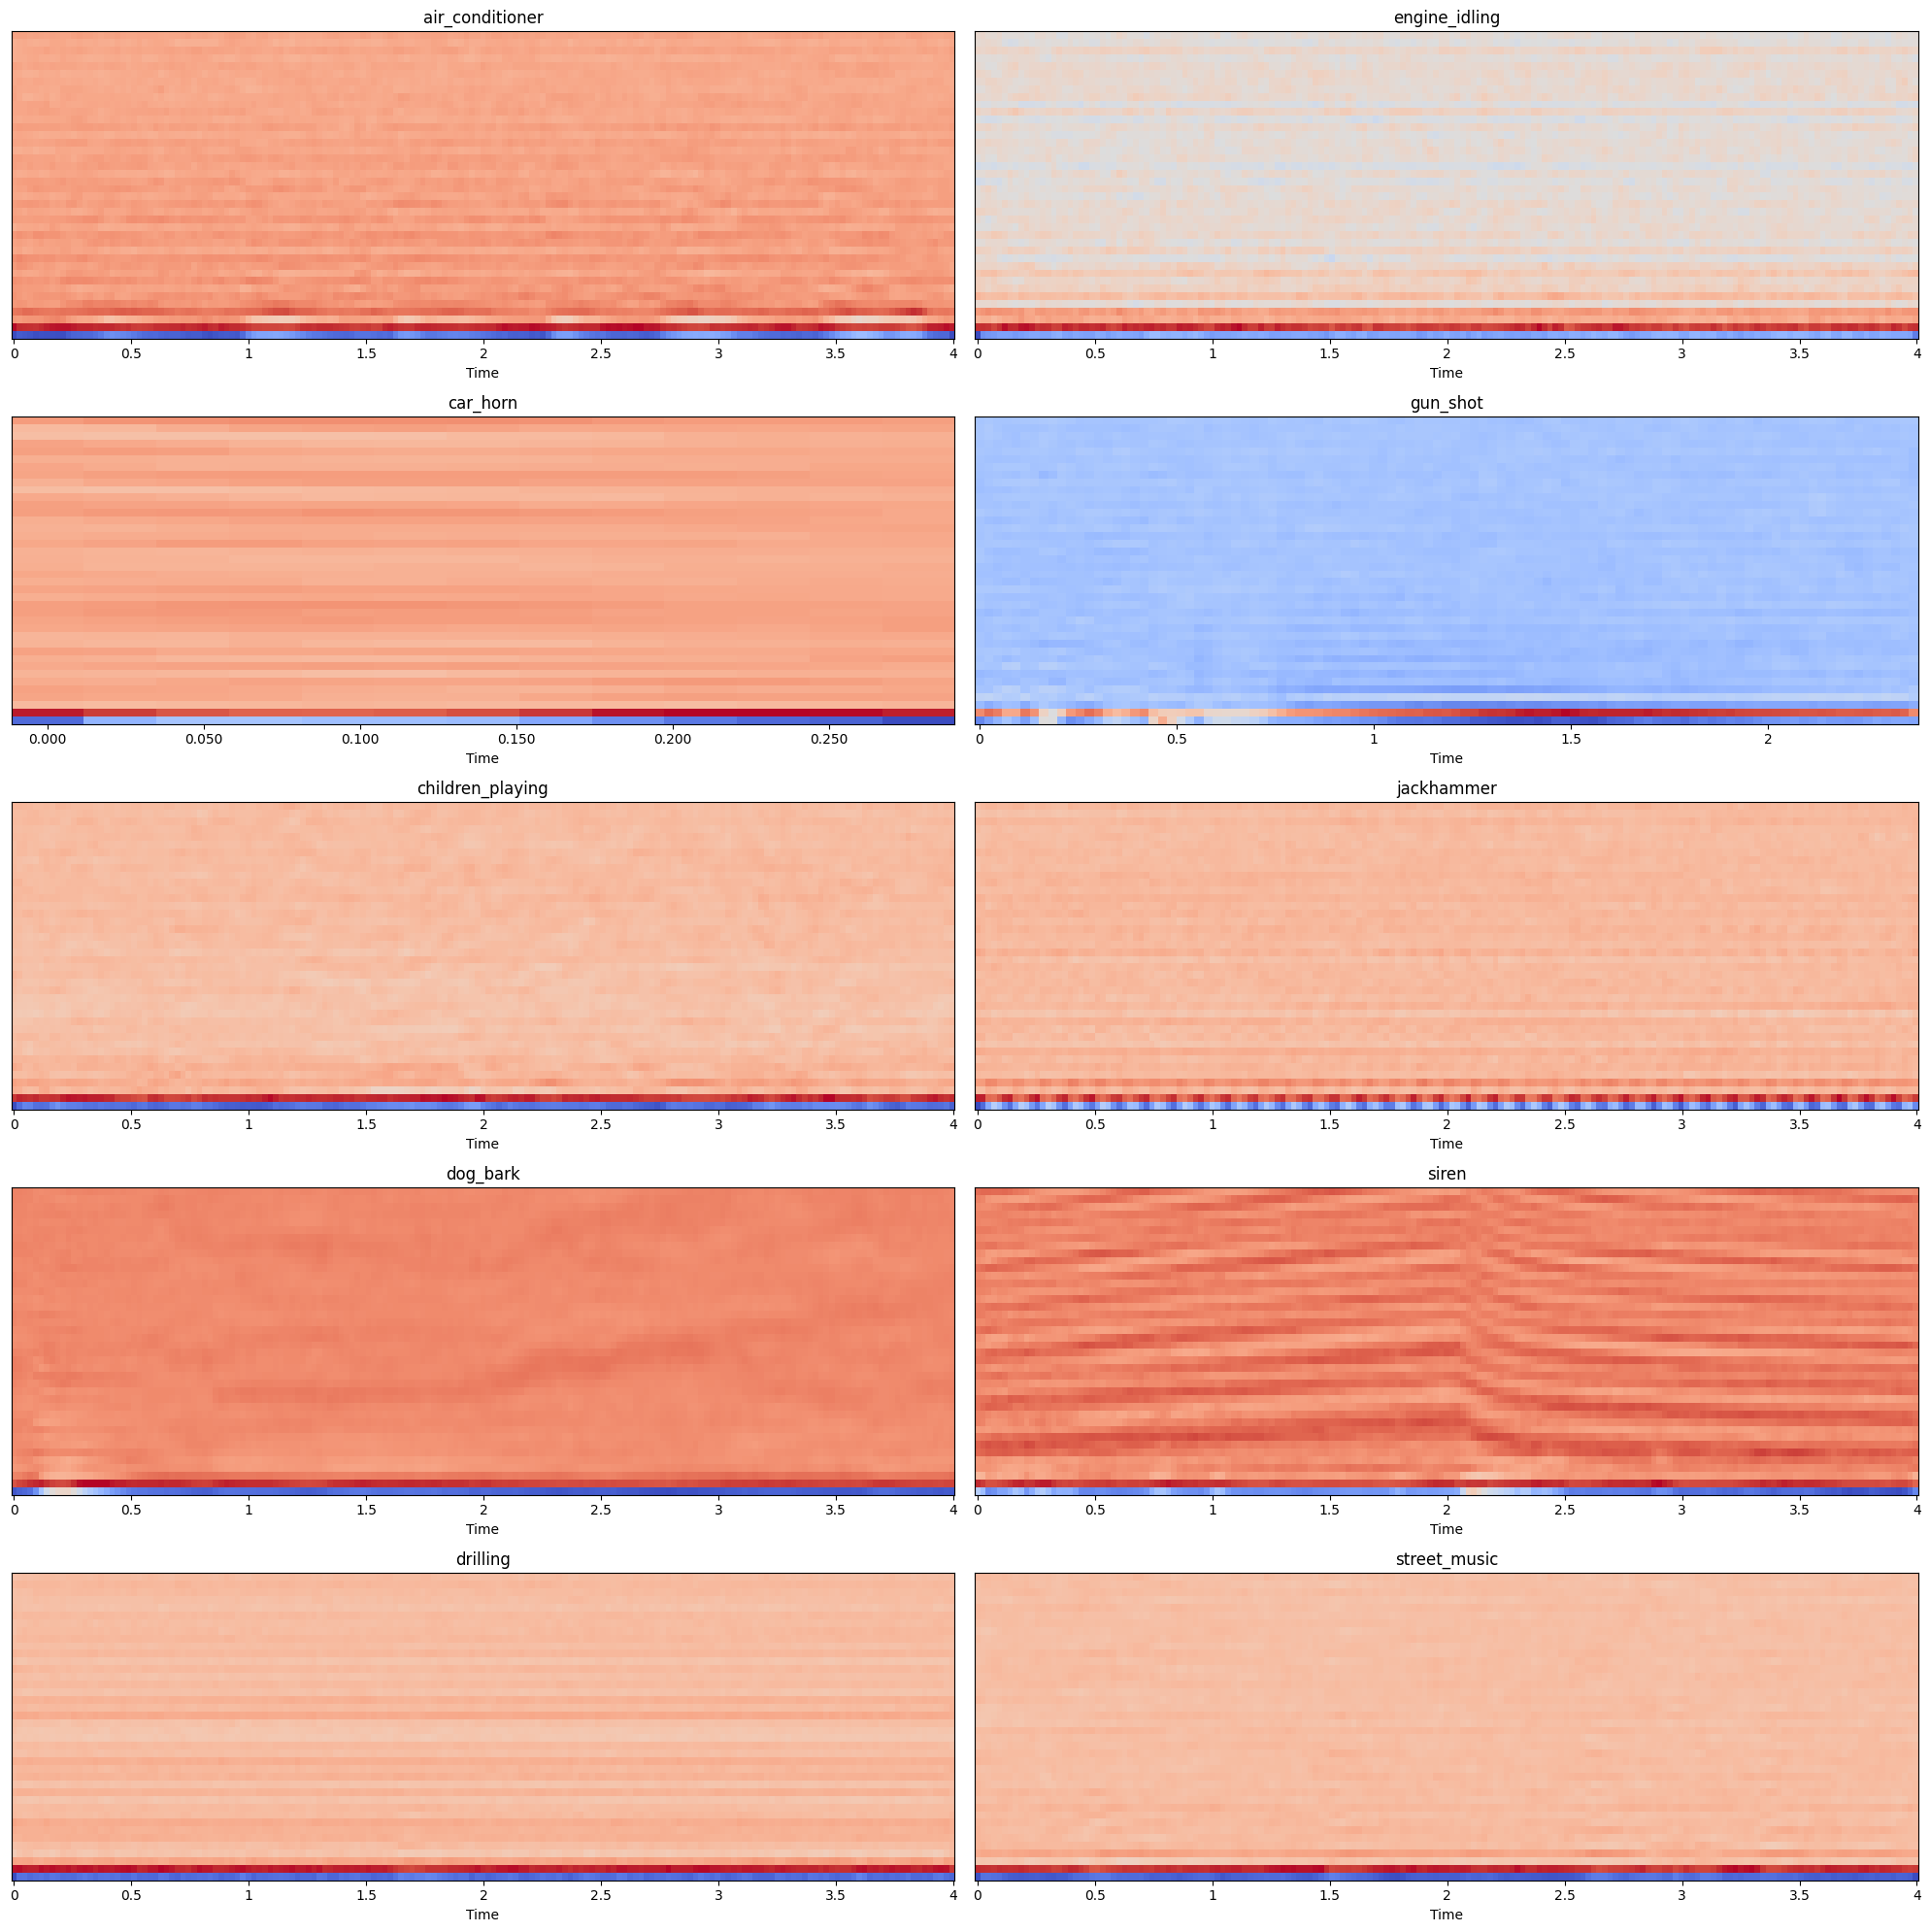

In [ ]:
# Visualize 40 MFCCs
fig, axs = plt.subplots(5, 2, figsize=(20,20))
index = 0
for col in range(2):
    for row in range(5):
        audio_file, sample_rate = librosa.load(audio_samples[index])
        mfccs = librosa.feature.mfcc(y=audio_file, sr=sample_rate, n_mfcc=40, dct_type=2)
        librosa.display.specshow(mfccs,
                             x_axis="time",
                             ax=axs[row][col])
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()


**Explore texture information from these spectrograms**

In [ ]:
audio_file, sample_rate = librosa.load(audio_samples[1])

mel_spec=librosa.feature.melspectrogram(y=audio_file,sr=sample_rate,n_mels=12,n_fft=1024,hop_length=512,win_length=1024,window='hann')
log_melspec = librosa.amplitude_to_db(mel_spec)
norm_melspec=(log_melspec-np.min(log_melspec))/(np.max(log_melspec)-np.min(log_melspec))
mel_img=np.flip(norm_melspec, 0)
plt.imshow(mel_img,cmap='hot')

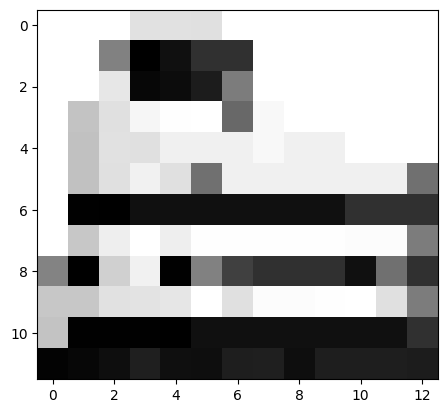

In [ ]:
fea_lbp = local_binary_pattern(mel_img,8,1) #Radius = 1, No. of neighbours = 8
fea_lbp = np.uint8((fea_lbp/fea_lbp.max())*255) #Converting to unit8
plt.imshow(fea_lbp, cmap='gray')